In [54]:
!pip install yfinance --upgrade --no-cache-dir
#yahoo 사이트의 finance 카테고리를 연결해서 주식 데이터를 얻을 수 있는 라이브러리

Requirement already up-to-date: yfinance in c:\program files\anaconda3\lib\site-packages (0.1.54)


In [55]:
import yfinance as yf

In [56]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [57]:
# from pandas_datareader import data
# #데이터를 야후 등의 사이트에서 바로 받아올 수 있는 기능을 가진 라이브러리

# # import yfinance as yf
# # yf.pdr_override()

# # start_date = '1990-1-1' 
# # end_date = '2017-6-30' 
# # KIA = data.get_data_yahoo('005930.KS', start_date, end_date)

In [58]:
yf.pdr_override() #yahoo finance에 연결하기 위한 초기화 작업

In [59]:
start_date = '1990-1-1'
end_date = '2020-07-20'

In [60]:
KIA = data.get_data_yahoo('035720.KS', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [61]:
KIA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-02-11,273000.0,273000.0,273000.0,273000.0,258278.734375,55300
2000-02-14,264000.0,298000.0,240500.0,247000.0,233680.750000,1254100
2000-02-15,250000.0,259000.0,217500.0,217500.0,205771.531250,648600
2000-02-16,210000.0,243500.0,200000.0,243500.0,230369.500000,871400
2000-02-17,246000.0,267500.0,235000.0,243500.0,230369.500000,1019800


In [62]:
KIA.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-13,359000.0,361000.0,345000.0,352000.0,352000.0,1391744
2020-07-14,340500.0,346500.0,340000.0,343000.0,343000.0,1212519
2020-07-15,344000.0,349500.0,332000.0,337500.0,337500.0,1487417
2020-07-16,332000.0,335500.0,319000.0,322000.0,322000.0,1941508
2020-07-17,319000.0,327000.0,314000.0,325000.0,325000.0,1268587


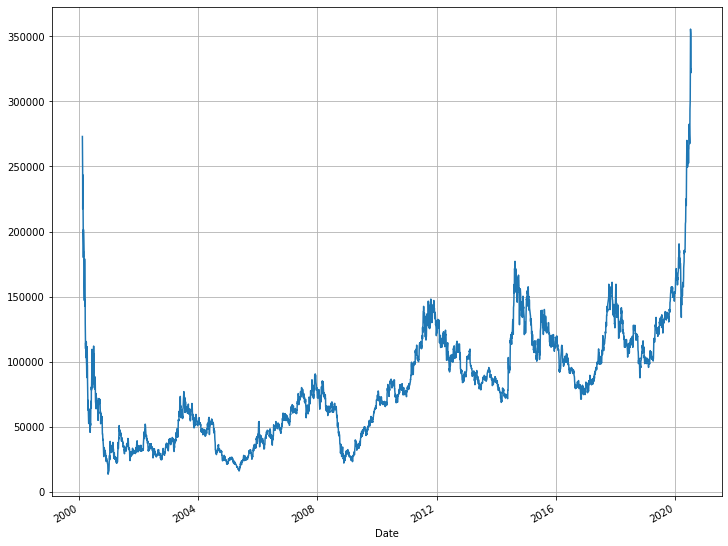

In [63]:
KIA['Close'].plot(figsize=(12, 10), grid=True) #그래프 사이즈, Grid= 격자

In [64]:
TSLA = data.get_data_yahoo('TSLA', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [65]:
TSLA.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-13,1659.000000,1794.989990,1471.109985,1497.060059,1497.060059,38985400
2020-07-14,1556.000000,1590.000000,1431.000000,1516.800049,1516.800049,23418100
2020-07-15,1543.000000,1550.000000,1457.000000,1546.010010,1546.010010,16367800
2020-07-16,1477.160034,1531.709961,1466.000000,1500.640015,1500.640015,14300800
2020-07-17,1513.449951,1537.510010,1490.000000,1500.839966,1500.839966,9330000


In [66]:
TSLA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


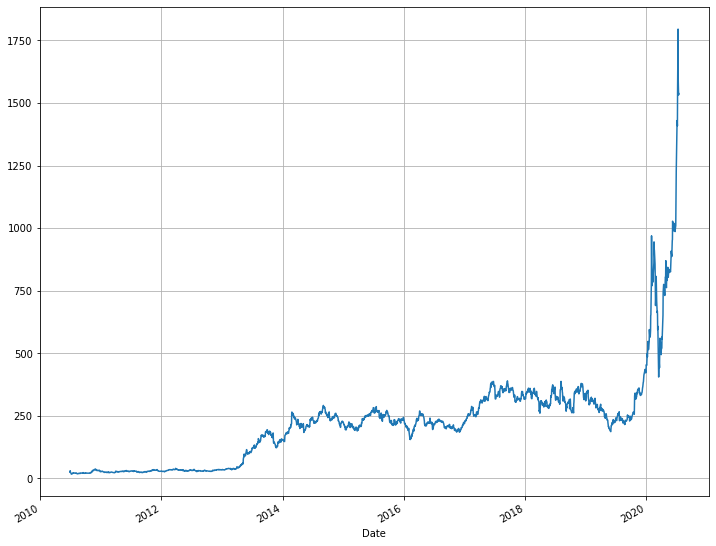

In [67]:
TSLA['High'].plot(figsize=(12, 10), grid=True) #그래프 사이즈, Grid= 격자

In [68]:
#facebook의 예측모델로 사용하려면, 2가지를 해야 한다.
#1. 날짜가 들어간 열이름을 ds로 설정 해줘야함.
#2. 예측값이 들어간 열 이름을 y로 설정해줘야함.
#3. 설정된 데이터 프레임으로 만들어줘야함 -> 데이터프레임을 prophet 객체 안에 넣어줘야함

In [69]:
#ds 만들기
df = pd.DataFrame({
    'ds': KIA.index, #여기 인덱스는 date로 들어감
    'y' : KIA['Close'] #숫자값-> 넣어줌
}) #칼럼 만들기

In [70]:
df

,ds,y
Date,,
2000-02-11,2000-02-11,273000.0
2000-02-14,2000-02-14,247000.0
2000-02-15,2000-02-15,217500.0
2000-02-16,2000-02-16,243500.0
2000-02-17,2000-02-17,243500.0
...,...,...
2020-07-13,2020-07-13,352000.0
2020-07-14,2020-07-14,343000.0
2020-07-15,2020-07-15,337500.0


In [71]:
s

In [72]:
df

,Date,ds,y
0,2000-02-11,2000-02-11,273000.0
1,2000-02-14,2000-02-14,247000.0
2,2000-02-15,2000-02-15,217500.0
3,2000-02-16,2000-02-16,243500.0
4,2000-02-17,2000-02-17,243500.0
...,...,...,...
5021,2020-07-13,2020-07-13,352000.0
5022,2020-07-14,2020-07-14,343000.0
5023,2020-07-15,2020-07-15,337500.0
5024,2020-07-16,2020-07-16,322000.0


In [73]:
m = Prophet(daily_seasonality=True)#시계열분석 예측 객체

In [74]:
m.fit(df)

In [75]:
future = m.make_future_dataframe(periods=365)

In [76]:
forecast = m.predict(future)

In [77]:
forecast #예측한것

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-02-11,241892.005375,104913.925116,151280.592791,241892.005375,241892.005375,-113780.600147,-113780.600147,-113780.600147,-108156.369801,...,-5360.775223,-5360.775223,-5360.775223,-263.455122,-263.455122,-263.455122,0.0,0.0,0.0,128111.405229
1,2000-02-14,240889.539564,104806.782608,151018.299716,240889.539564,240889.539564,-113281.776503,-113281.776503,-113281.776503,-108156.369801,...,-5554.698835,-5554.698835,-5554.698835,429.292134,429.292134,429.292134,0.0,0.0,0.0,127607.763061
2,2000-02-15,240555.384293,105738.788649,149754.666638,240555.384293,240555.384293,-112984.628468,-112984.628468,-112984.628468,-108156.369801,...,-5459.344640,-5459.344640,-5459.344640,631.085973,631.085973,631.085973,0.0,0.0,0.0,127570.755825
3,2000-02-16,240221.229023,103163.074461,148570.390085,240221.229023,240221.229023,-112653.606651,-112653.606651,-112653.606651,-108156.369801,...,-5307.671151,-5307.671151,-5307.671151,810.434301,810.434301,810.434301,0.0,0.0,0.0,127567.622372
4,2000-02-17,239887.073752,105511.534137,152590.346717,239887.073752,239887.073752,-112549.573309,-112549.573309,-112549.573309,-108156.369801,...,-5356.603055,-5356.603055,-5356.603055,963.399548,963.399548,963.399548,0.0,0.0,0.0,127337.500443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5386,2021-07-13,308134.161937,171430.608470,235688.202601,288470.849883,329222.507692,-104181.461646,-104181.461646,-104181.461646,-108156.369801,...,-5459.344640,-5459.344640,-5459.344640,9434.252795,9434.252795,9434.252795,0.0,0.0,0.0,203952.700291
5387,2021-07-14,308194.948253,171554.624980,235886.571619,288466.459802,329394.038486,-104287.068861,-104287.068861,-104287.068861,-108156.369801,...,-5307.671151,-5307.671151,-5307.671151,9176.972092,9176.972092,9176.972092,0.0,0.0,0.0,203907.879392
5388,2021-07-15,308255.734568,173079.359240,234404.561631,288397.874481,329565.569280,-104647.914046,-104647.914046,-104647.914046,-108156.369801,...,-5356.603055,-5356.603055,-5356.603055,8865.058811,8865.058811,8865.058811,0.0,0.0,0.0,203607.820522
5389,2021-07-16,308316.520883,172952.086296,237343.337895,288326.934116,329735.139376,-105013.460018,-105013.460018,-105013.460018,-108156.369801,...,-5360.775223,-5360.775223,-5360.775223,8503.685007,8503.685007,8503.685007,0.0,0.0,0.0,203303.060866


In [78]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5386,2021-07-13,203952.700291,171430.608470,235688.202601
5387,2021-07-14,203907.879392,171554.624980,235886.571619
5388,2021-07-15,203607.820522,173079.359240,234404.561631
5389,2021-07-16,203303.060866,172952.086296,237343.337895
5390,2021-07-17,221839.472747,192143.881113,253516.327510


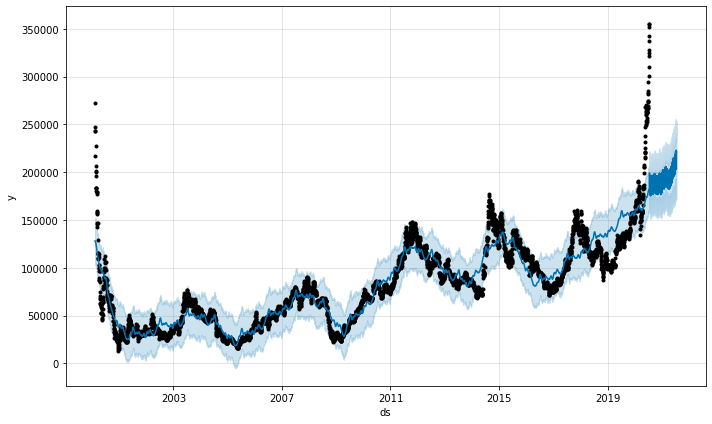

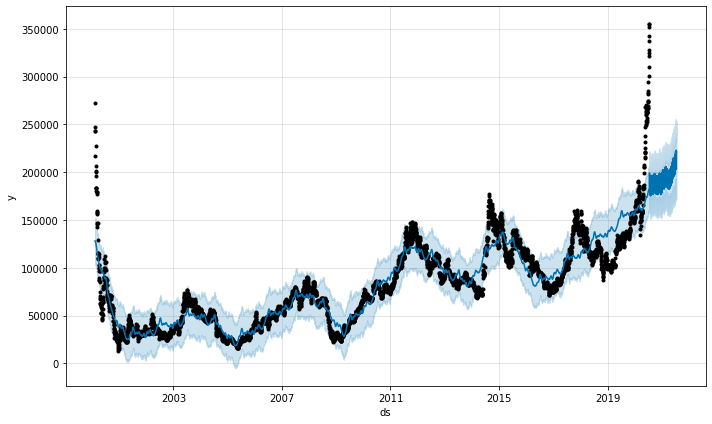

In [79]:
m.plot(forecast)

#검정색 -> 실제데이터
#파란색 -> 예측데이터 

### 상장 주식회사 주가 예측

In [ ]:
#네이버 : 035420.KS
#삼성전자
#이커머스 -> 2개 선정 ( )
# AWS, MS, google 

In [82]:
NAVER = data.get_data_yahoo('035420.KS', start_date, end_date)
NAVER

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-10-29,1797.719971,1797.719971,1797.719971,1797.719971,1695.220947,501745
2002-10-30,2012.229980,2012.229980,1989.750000,2012.229980,1897.500488,20892185
2002-10-31,2042.869995,2091.899902,1865.140015,1912.130005,1803.108032,32327083
2002-11-01,1961.150024,2022.439941,1724.180054,1793.640015,1691.373535,18373668
2002-11-04,1777.300049,1789.550049,1660.849976,1703.750000,1606.608643,16939411
...,...,...,...,...,...,...
2020-07-13,303500.000000,303500.000000,288000.000000,297000.000000,297000.000000,1254800
2020-07-14,290000.000000,291000.000000,285000.000000,287000.000000,287000.000000,1360849
2020-07-15,290500.000000,293000.000000,280500.000000,286500.000000,286500.000000,1276196


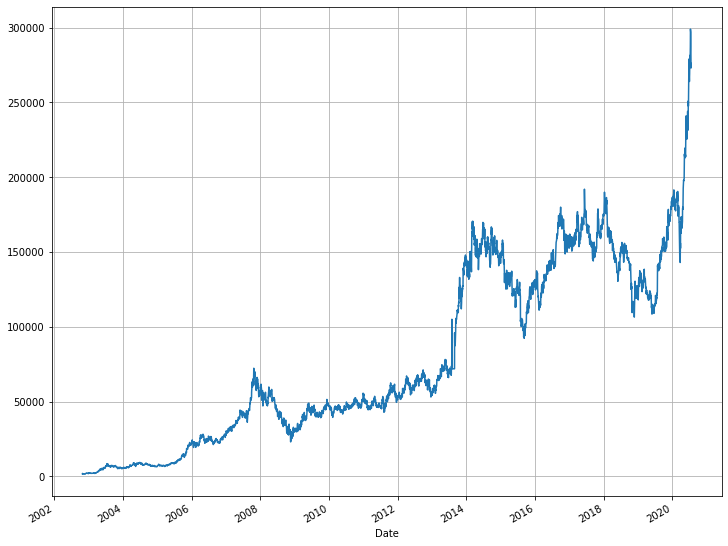

In [83]:
NAVER['Close'].plot(figsize=(12, 10), grid=True) #그래프 사이즈, Grid= 격자

In [84]:
#ds 만들기
df = pd.DataFrame({
    'ds': NAVER.index, #여기 인덱스는 date로 들어감
    'y' : NAVER['Close'] #숫자값-> 넣어줌
}) #칼럼 만들기

In [86]:
df

,ds,y
Date,,
2002-10-29,2002-10-29,1797.719971
2002-10-30,2002-10-30,2012.229980
2002-10-31,2002-10-31,1912.130005
2002-11-01,2002-11-01,1793.640015
2002-11-04,2002-11-04,1703.750000
...,...,...
2020-07-13,2020-07-13,297000.000000
2020-07-14,2020-07-14,287000.000000
2020-07-15,2020-07-15,286500.000000


In [87]:
df.reset_index(inplace=True) #인덱스를 새로 만듦

In [88]:
df

,Date,ds,y
0,2002-10-29,2002-10-29,1797.719971
1,2002-10-30,2002-10-30,2012.229980
2,2002-10-31,2002-10-31,1912.130005
3,2002-11-01,2002-11-01,1793.640015
4,2002-11-04,2002-11-04,1703.750000
...,...,...,...
4369,2020-07-13,2020-07-13,297000.000000
4370,2020-07-14,2020-07-14,287000.000000
4371,2020-07-15,2020-07-15,286500.000000
4372,2020-07-16,2020-07-16,273000.000000


In [90]:
m_naver = Prophet(daily_seasonality=True)#시계열분석 예측 객체

In [91]:
m_naver.fit(df)

In [92]:
naver_future = m_naver.make_future_dataframe(periods=365)

In [93]:
forecast = m_naver.predict(naver_future)

In [94]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2002-10-29,1867.539170,-16252.485443,21426.490221,1867.539170,1867.539170,920.389033,920.389033,920.389033,318.393276,...,103.295198,103.295198,103.295198,498.700559,498.700559,498.700559,0.0,0.0,0.0,2787.928203
1,2002-10-30,1875.537426,-16355.536589,20588.027234,1875.537426,1875.537426,788.701607,788.701607,788.701607,318.393276,...,-5.706870,-5.706870,-5.706870,476.015200,476.015200,476.015200,0.0,0.0,0.0,2664.239032
2,2002-10-31,1883.535681,-16395.408243,21446.080463,1883.535681,1883.535681,833.457673,833.457673,833.457673,318.393276,...,67.716463,67.716463,67.716463,447.347934,447.347934,447.347934,0.0,0.0,0.0,2716.993353
3,2002-11-01,1891.533936,-18191.649132,21336.887890,1891.533936,1891.533936,681.642219,681.642219,681.642219,318.393276,...,-48.978842,-48.978842,-48.978842,412.227784,412.227784,412.227784,0.0,0.0,0.0,2573.176155
4,2002-11-04,1915.528701,-16526.048394,22061.937905,1915.528701,1915.528701,549.095471,549.095471,549.095471,318.393276,...,-36.727782,-36.727782,-36.727782,267.429976,267.429976,267.429976,0.0,0.0,0.0,2464.624172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4734,2021-07-13,172315.468877,152493.387219,199933.733375,160868.462676,183160.001725,3967.050992,3967.050992,3967.050992,318.393276,...,103.295198,103.295198,103.295198,3545.362517,3545.362517,3545.362517,0.0,0.0,0.0,176282.519869
4735,2021-07-14,172329.234197,152347.227314,199184.752348,160842.022081,183208.597894,3508.860084,3508.860084,3508.860084,318.393276,...,-5.706870,-5.706870,-5.706870,3196.173677,3196.173677,3196.173677,0.0,0.0,0.0,175838.094280
4736,2021-07-15,172342.999516,151292.895615,198724.567696,160815.581485,183254.966205,3202.497311,3202.497311,3202.497311,318.393276,...,67.716463,67.716463,67.716463,2816.387572,2816.387572,2816.387572,0.0,0.0,0.0,175545.496827
4737,2021-07-16,172356.764836,152355.128515,199762.129355,160789.985930,183298.950897,2679.433490,2679.433490,2679.433490,318.393276,...,-48.978842,-48.978842,-48.978842,2410.019056,2410.019056,2410.019056,0.0,0.0,0.0,175036.198326


In [95]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4734,2021-07-13,176282.519869,152493.387219,199933.733375
4735,2021-07-14,175838.094280,152347.227314,199184.752348
4736,2021-07-15,175545.496827,151292.895615,198724.567696
4737,2021-07-16,175036.198326,152355.128515,199762.129355
4738,2021-07-17,174630.652323,151864.961148,198481.898937


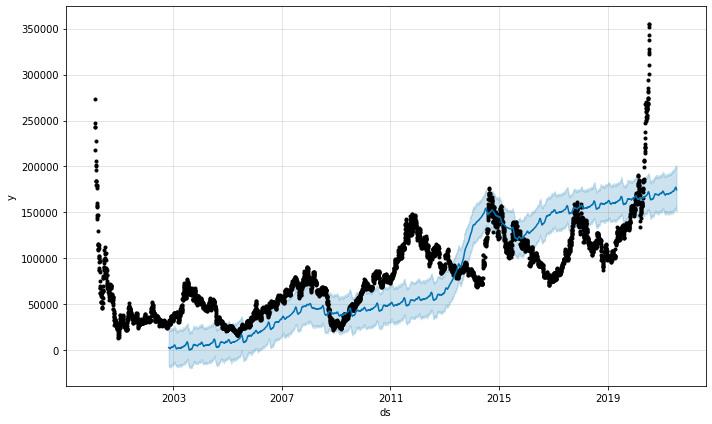

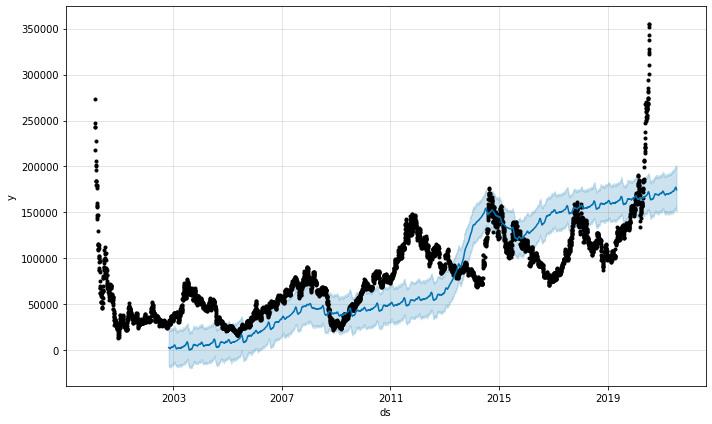

In [96]:
m.plot(forecast)

#검정색 -> 실제데이터
#파란색 -> 예측데이터 

## 시계열분석